<a href="https://colab.research.google.com/github/knsspsj19/Pythonproject/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  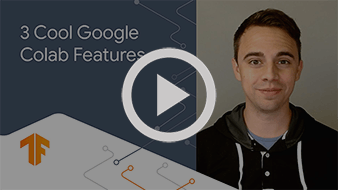
  </a>
</center>

In [498]:
import pandas as pd
train=pd.read_csv("/content/train (1).csv")
test=pd.read_csv("/content/test (1).csv")
train.shape,test.shape
comb=pd.concat([train,test],axis=0)
comb.head()


,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [499]:
df=comb.copy()
df.columns
col1=['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income']

In [500]:
df["own_self_emp"]
df["income"].value_counts()
def income(i):
  if i=="Less than 50K $":
    return 0
  elif i=="More than 50K $":
    return 1
df["income"]=df["income"].apply(income)
#comb.groupby("major_ind_code")["income"].sum()
df["income"].value_counts()

0.0    65272
1.0    39728
Name: income, dtype: int64

In [501]:
df.groupby("own_self_emp")["income"].mean()
def a(i):
  if "1" in str(i):
    return 5


In [502]:

df.loc[df["own_self_emp"]==1,"own_self_emp"]=5
df["own_self_emp"].value_counts()

0    133131
2     11890
5      1979
Name: own_self_emp, dtype: int64

In [503]:
col1
df.groupby('veteran benefits')["income"].mean()
df.loc[df["veteran benefits"]==1,"veteran benefits"]=5
df["veteran benefits"].value_counts()

2    110712
0     34824
5      1464
Name: veteran benefits, dtype: int64

In [504]:
col1
for i in df.columns:
  print(df.groupby(i)["income"].mean())

ID
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
149995    NaN
149996    NaN
149997    NaN
149998    NaN
149999    NaN
Name: income, Length: 147000, dtype: float64
year_of_poll
2004    0.379355
2005    0.377370
Name: income, dtype: float64
own_self_emp
0    0.375795
2    0.389472
5    0.482493
Name: income, dtype: float64
veteran benefits
0    0.340047
2    0.389662
5    0.433560
Name: income, dtype: float64
currently_enrolled
 High school          0.375445
College/University    0.376775
Name: income, dtype: float64
race
 Black                      0.352690
 Other                      0.344703
 White                      0.381798
Amer/Indian/Aleut/Eskimo    0.351789
Asian/Pacific_Islander      0.401311
Name: income, dtype: float64
father_country
 ?                               0.384899
 Cambodia                        0.348624
 Canada                          0.379261
 China                           0.412442
 Columbia                        0.359

In [505]:
col1
df.sort_values(["gains","dividends"])["income"]
df.educ.value_counts()
def ed(i):
  if i in [" Doctorate degree(PhD EdD)"," Prof school degree (MD DDS DVM LLB JD)"," Masters degree(MA MS MEng MEd MSW MBA)"," Bachelors degree(BA AB BS)"]:
    return 100
  else:
    return 0

df["educ"]=df["educ"].apply(ed)



In [506]:
df["father_country"].isnull().sum()

0

In [507]:
df.columns
df["father_country"].value_counts()
def count(i):
  if i in [" United-States"," Germany"," India"," France"," Hong Kong"," Holand-Netherlands"," Japan"," England"," Scotland"]:
    return 50
  else:
    return 0

df["country"]=df["father_country"].apply(count)

In [508]:
df.columns
df.drop(["father_country","self_country","mother_country"],axis=1,inplace=True)

In [509]:
df.drop('currently_enrolled',axis=1,inplace=True)

In [510]:
list(df["major_occ_code"].value_counts().index)
other=[' Adm support including clerical',
 ' Other service',
 ' Sales',
 ' Precision production craft & repair',
 ' Machine operators assmblrs & inspctrs',
 ' Handlers equip cleaners etc ',
 ' Transportation and material moving',
 ' Farming forestry and fishing',
 ' Technicians and related support',
 ' Protective services',
 ' Private household services']

df.drop('major_ind_code',axis=1,inplace=True)

In [511]:

df["major_occ_code"].value_counts()
def oc(i):
  if i in [" Professional specialty"," Executive admin and managerial"," Armed Forces"]:
    return 20
  elif i in other:
    return 0
  
df["major_occ_code"]=df["major_occ_code"].apply(oc)


In [512]:
df['house_summary'].isnull().sum()

0

In [513]:
df['house_summary'].value_counts()
def hhld(i):
  if i==" Householder":
    return 5
  else:
    return 0
df['house_summary']=df['house_summary'].apply(hhld)

In [514]:
df['gender']
def g(i):
  if i=="M":
    return 3
  else:
    return 0

df['gender']=df['gender'].apply(g)

In [515]:
df.loc[~(df["unemp_reason"].isnull())& ~(df["income"].isnull())][["income"]].value_counts()
def unem(i):
  if i==np.nan:
    return 3
  else:
    return 0

df["unemp_reason"].apply(unem).value_counts()

0    147000
Name: unemp_reason, dtype: int64

In [516]:
df["woker_type"].value_counts()
def work(i):
  if i in ["Self_emp_inc","Fed_Govt"]:
    return 3
  elif i in ["Pvt","Self_emp_not_inc","Loc_Govt","St_Govt"," Never worked"," Without pay"]:
    return 0

df["woker_type"]=df["woker_type"].apply(work)

In [517]:
df.drop(["ID","year_of_poll"],axis=1,inplace=True)

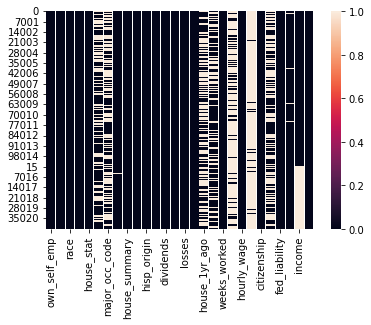

In [518]:
import seaborn as sns
sns.heatmap(df.isnull())

In [519]:
df.groupby("income")["hourly_wage"].mean()

income
0.0    90.253326
1.0    98.794399
Name: hourly_wage, dtype: float64

In [520]:
df["house_stat"].value_counts()
def child18(i):
  if "<18" in str(i):
    return 0
  elif "18+" in str(i):
    return 1

df["child18+"]=df["house_stat"].apply(child18)
df["house_stat"].value_counts()
def marr(i):
  if ("never marr") in str(i) or ("never married") in str(i):
    return 0
  elif "ever marr" in str(i):
    return 1

df["married"]=df["house_stat"].apply(marr)
df["house_stat"].value_counts()
def subfam(i):
  if ("Not" in str(i)) or ("not" in str(i)):
    return 0
  else:
    return 1
df["subfam"]=df["house_stat"].apply(subfam)

df["house_stat"].value_counts()

def house(i):
  if ("Householder" in str(i)) or ("householder" in str(i)):
    return 1
  else:
    return 0
df["householder"]=df["house_stat"].apply(house)

In [521]:
df.drop("house_stat",axis=1,inplace=True)

In [522]:
df.drop("unemp_reason",axis=1,inplace=True) #"full_partime_job"]]

In [523]:
df.columns
def ag(i):
  if (i<20) or (i>70):
    return 0
  elif 20<i<70:
    return 3

df["age"]=df["age"].apply(ag)



In [524]:
#df.groupby("income")['labour_union'].mean()
def lu(i):
  if i=="yes":
    return 1
  elif i=="no":
    return 0

df["labour_union"]=df["labour_union"].apply(lu)

In [525]:
df.drop("under18",axis=1,inplace=True)

In [526]:
df.columns  # hou1yr,inc fill,week work
df.iloc[:3,22:] # "race","hisp_origin","marriage_status","citizenship","fed_liability","full_partime_job"
df.columns

Index(['own_self_emp', 'veteran benefits', 'race', 'educ', 'labour_union',
       'major_occ_code', 'age', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'hourly_wage',
       'citizenship', 'woker_type', 'fed_liability', 'full_partime_job',
       'income', 'country', 'child18+', 'married', 'subfam', 'householder'],
      dtype='object')

In [527]:
df["educ"].value_counts()

0      125334
100     21666
Name: educ, dtype: int64

In [528]:
df["full_partime_job"].value_counts()
dfs=df.sort_values(["income","educ","major_occ_code","house_summary","veteran benefits","country","gains","dividends","hourly_wage","labour_union","weeks_worked"])

In [529]:
dfsfill=dfs.ffill().bfill()

In [530]:
dfsfill.drop(["house_1yr_ago","married"],axis=1)

,own_self_emp,veteran benefits,race,educ,labour_union,major_occ_code,age,house_summary,gender,hisp_origin,...,hourly_wage,citizenship,woker_type,fed_liability,full_partime_job,income,country,child18+,subfam,householder
6414,0,2,Other,0,0.0,0.0,3.0,0,0,Central/South_American,...,0.0,FB,0.0,Joint_both_under65,Children/Armed_Forces,0.0,0,1.0,1,1
6812,0,2,Asian/Pacific_Islander,0,0.0,0.0,3.0,0,3,All_Other,...,0.0,FB,0.0,Nonfiler,Full-time schedules,0.0,0,1.0,0,0
6834,0,2,Asian/Pacific_Islander,0,0.0,0.0,3.0,0,0,All_Other,...,0.0,FB,0.0,Nonfiler,Full-time schedules,0.0,0,1.0,0,0
7974,0,2,White,0,0.0,0.0,3.0,0,3,Central/South_American,...,0.0,FB,0.0,Nonfiler,Full-time schedules,0.0,0,1.0,0,0
8643,0,2,White,0,0.0,0.0,0.0,0,0,All_Other,...,0.0,FB_US,0.0,Nonfiler,Children/Armed_Forces,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20360,0,5,White,100,0.0,20.0,0.0,5,3,All_Other,...,0.0,NB_US,0.0,Joint_both_Above65,Children/Armed_Forces,1.0,50,1.0,1,1
32279,0,5,White,100,0.0,20.0,0.0,5,3,All_Other,...,0.0,NB_US,0.0,Single,Children/Armed_Forces,1.0,50,1.0,1,1
22395,0,5,White,100,0.0,20.0,0.0,5,0,All_Other,...,0.0,NB_US,0.0,Joint_both_Above65,Not in labor force,1.0,50,1.0,1,1
36530,0,5,White,100,0.0,20.0,0.0,5,3,All_Other,...,0.0,NB_US,0.0,Joint_both_Above65,Children/Armed_Forces,1.0,50,1.0,1,1


In [531]:
df_dum=pd.get_dummies(dfsfill,drop_first=True)

In [532]:
combos.value_cuout()

NameError: ignored

In [ ]:
import numpy as np
cat=[]
for i in comb.select_dtypes(include=[np.object]).columns:
  if len(comb[i].value_counts())<20:
    cat.append(i)
comb[cat].head()

In [ ]:
comb[cat].columns
comb["currently_enrolled"].value_counts()
def enroll(i):
  if i=="College/University":
    return 1
  elif i==" High school":
    return 0
comb["currently_enrolled"]=comb["currently_enrolled"].apply(enroll)

In [ ]:
comb[cat].columns
comb["race"].value_counts()
def race(i):
  if i==" White":
    return 4
  elif i==" Black":
    return 3
  elif i=="Asian/Pacific_Islander":
    return 2
  elif i==" Other":
    return 1
  elif i=="Amer/Indian/Aleut/Eskimo":
    return 0

comb["race"]=comb["race"].apply(race)

In [ ]:
comb["father_country"].isnull().sum()

In [ ]:
comb["father_country"].value_counts()
def fat(i):
  if i==" United-States":
    return 2
  elif i in [" Mexico"," ?"," Puerto-Rico"," Italy"," Germany"]:
    return 1
  else:
    return 0
comb["father_country"]=comb["father_country"].apply(fat)




In [ ]:

def yr(i):
  if i==2004:
    return 0
  elif i==2005:
    return 1
comb["year_of_poll"]=comb["year_of_poll"].apply(yr)

In [ ]:
comb["educ"].isnull().sum()

In [ ]:
comb["educ"].value_counts()
def educ(i):
  if i in ["Doctorate degree(PhD EdD)"," Prof school degree (MD DDS DVM LLB JD)"]:
    return 5
  elif i==" Masters degree(MA MS MEng MEd MSW MBA)":
    return 4
  elif i in [" Bachelors degree(BA AB BS)"," Associates degree-occup /vocational"," Associates degree-academic program"]:
    return 3
  elif i==" Children":
    return 0
  elif i in ["High school graduate"," Some college but no degree"," 12th grade no diploma"," 10th grade"," 11th grade"]:
    return 2
  else:
    return 1
comb["educ"]=comb["educ"].apply(educ)

In [ ]:
comb["house_stat"].value_counts()
def child18(i):
  if "<18" in str(i):
    return 0
  elif "18+" in str(i):
    return 1

comb["child18+"]=comb["house_stat"].apply(child18)
comb["house_stat"].value_counts()
def marr(i):
  if ("never marr") in str(i) or ("never married") in str(i):
    return 0
  elif "ever marr" in str(i):
    return 1

comb["married"]=comb["house_stat"].apply(marr)
comb["house_stat"].value_counts()
def subfam(i):
  if ("Not" in str(i)) or ("not" in str(i)):
    return 0
  else:
    return 1
comb["subfam"]=comb["house_stat"].apply(subfam)

comb["house_stat"].value_counts()

def house(i):
  if ("Householder" in str(i)) or ("householder" in str(i)):
    return 1
  else:
    return 0
comb["householder"]=comb["house_stat"].apply(house)


In [ ]:
comb.drop("house_stat",axis=1,inplace=True)

In [ ]:
comb.head()
comb["income"].value_counts()
def income(i):
  if i=="Less than 50K $":
    return 0
  elif i=="More than 50K $":
    return 1
comb["income"]=comb["income"].apply(income)
#comb.groupby("major_ind_code")["income"].sum()
comb["income"].value_counts()


In [ ]:
comb.groupby("major_ind_code")["income"].mean()
def job(i):
  if i in [" Armed Forces"," Other professional services"," Utilities and sanitary services"," Communications"]:
    return 2
  elif i in [" Agriculture"," Construction"," Hospital services"," Not in universe or children"," Personal services except private HH"," Private household services"," Social services"]:
    return 0
  else:
     return 1
comb["major_ind_code"]=comb["major_ind_code"].apply(job)
comb["major_ind_code"].value_counts()

In [ ]:
comb.iloc[:5,8:20]
def lab(i):
  if i=="no":
    return 0
  elif i=="yes":
    return 1




In [ ]:
comb["labour_union"]=comb["labour_union"].apply(lab)

<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

In [ ]:
comb.drop(["self_country","mother_country"],axis=1,inplace=True)

In [ ]:
comb.iloc[:5,8:20]
comb.drop("major_occ_code",axis=1,inplace=True)

In [ ]:
comb.iloc[:5,8:20]
comb=pd.concat([comb,pd.get_dummies(comb["house_summary"],drop_first=True)],axis=1).drop("house_summary",axis=1)
comb.iloc[:5,8:20]

In [ ]:
def gender(i):
  if i=="M":
    return 1
  elif i=="F":
    return 0

In [ ]:
comb["gender"]=comb["gender"].apply(gender)
comb.iloc[:5,8:20]
comb.drop("hisp_origin",axis=1,inplace=True)

In [ ]:
comb.iloc[:5,8:20]
comb.groupby("marriage_status")["income"].mean()
comb=pd.concat([comb,pd.get_dummies(comb["marriage_status"],drop_first=True)],axis=1).drop("marriage_status",axis=1)

In [ ]:
comb.iloc[:5,20:]
#comb["unemp_reason"].value_counts()
#comb["full_partime_job"].value_counts()
comb_dum=pd.get_dummies(comb,drop_first=True)



In [ ]:
comb['unemp_reason'].isnull().sum()

In [ ]:
comb.columns
comb['unemp_reason'].value_counts()
def unemp(i):
  if i in ["Job loser_Other","Job loser_layoff"]:
    return 0
  elif i==" Job leaver":
    return 3
  elif i in [" Re-entrant"," New entrant"]:
    return 1

comb['unemp_reason']=comb['unemp_reason'].apply(unemp)
comb['unemp_reason'].value_counts()
  

In [ ]:
comb.groupby('citizenship')["income"].mean()
def cit(i):
  if "US" in i:
    return 1
  else:
    return 0
  
comb['citizenship']=comb['citizenship'].apply(cit)

In [ ]:
comb.groupby('woker_type')["income"].mean()
def worker(i):
  if i in [" Never worked"," Without pay"]:
    return 0
  elif i=="Self_emp_inc":
    return 3
  elif i in ["Fed_Govt","Loc_Govt","Pvt","Self_emp_not_inc","St_Govt"]:
    return 1
#comb.groupby('woker_type')["income"].mean()
comb["woker_type"]=comb["woker_type"].apply(worker)

In [ ]:
comb.columns
comb.groupby('fed_liability')["income"].mean()
def fed(i):
  if "Joint" in str(i):
    return 1
  else:
    return 0
comb["fed_liability"]=comb["fed_liability"].apply(fed)


In [ ]:
comb["fed_liability"].value_counts()
comb.groupby('full_partime_job')["income"].mean()
def fulltime(i):
  if i in [" Full-time schedules"," PT for non-econ reasons usually FT"]:
    return 2
  elif "Unemployed" in str(i):
    return 0
  elif i in [" Not in labor force"," PT for econ reasons usually FT"," PT for econ reasons usually PT",""]:
    return 1

#comb.groupby('full_partime_job')["income"].mean()
comb["full_partime_job"]=comb["full_partime_job"].apply(fulltime)
comb["full_partime_job"].value_counts()

In [ ]:
comb.columns
#comb_fill=comb.drop("ID",axis=1).sort_values(['veteran benefits','gains','age',"gender"]).ffill().bfill()


In [ ]:
comb.iloc[:5,10:20]
comb["house_1yr_ago"].value_counts()

def hs(i):
  if "Yes" in str(i):
    return 1
  elif "No" in str(i):
    return 0


In [ ]:
comb["house_1yr_ago"]=comb["house_1yr_ago"].apply(hs)

In [ ]:
comb.iloc[:5,10:20]
comb["income_filled"]=comb["income_filled"].apply(hs)
comb.iloc[:5,10:20]

In [ ]:
comb.groupby("under18")["income"].mean()

In [ ]:
comb["under18"].isnull().sum()

In [ ]:
comb.groupby("under18")["income"].mean()
def und18(i):
  if i in ["Both_Pr","Only_Dad"]:
    return 1
  else:
    return 0
comb["under18"]=comb["under18"].apply(und18)
comb["under18"].value_counts()

In [ ]:
comb["age"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
comb["age"]=scaler.fit_transform((comb["age"].to_numpy()).reshape(-1,1))
comb["age"]

In [ ]:
#for i in comb.columns:
#  if comb[i].isnull().sum()/comb.shape[0]>0.70:
#    print(i)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
comb_imp=imputer.fit_transform(comb)


In [ ]:
comb_imp_df=pd.DataFrame(comb_imp,columns=comb.columns)
comb_imp_df


In [ ]:
comb_imp_df[["Child_Above18","Child_U18_Married","Child_U18_Unmarried","child18+"]]
comb["child_new"]=comb_imp_df["Child_Above18"]+comb_imp_df["Child_U18_Married"]+comb_imp_df["Child_U18_Unmarried"]+comb_imp_df["child18+"]
comb_imp_df.drop(["Child_Above18","Child_U18_Married","Child_U18_Unmarried","child18+"],axis=1,inplace=True)

In [ ]:
comb_imp_df[["Non_Relative","Relative","Spouse","Sy_Individual"," Separated"," Widowed",
             "Married_AF_Sp_Pr","Married_Sp_Ab","Married_civilian_Sp_Pr","Unmarried"]]
comb["marry"]=comb_imp_df["Non_Relative"]+comb_imp_df["Relative"]+comb_imp_df["Spouse"]+comb_imp_df["Sy_Individual"]+comb_imp_df[" Separated"]+comb_imp_df[" Widowed"]+comb_imp_df[" Widowed"]+comb_imp_df["Married_AF_Sp_Pr"]+comb_imp_df["Married_Sp_Ab"]+comb_imp_df["Married_civilian_Sp_Pr"]+comb_imp_df["Unmarried"]

comb_imp_df.drop(["Non_Relative","Relative","Spouse","Sy_Individual"," Separated"," Widowed",
             "Married_AF_Sp_Pr","Married_Sp_Ab","Married_civilian_Sp_Pr","Unmarried"],axis=1,inplace=True)

In [ ]:
comb.columns
#comb.drop(["under18","unemp_reason"],axis=1,inplace=True)

In [533]:
X=df_dum.drop("income",axis=1)
y=df_dum["income"]

In [534]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.4,stratify=df_dum["income"])


In [ ]:
#train.shape,test.shape
#train_c=comb_imp_df.iloc[:105000,:]
#test_c=comb_imp_df.iloc[105000:,:]
#X=train_c.drop("income",axis=1)
#y=train_c["income"]
#xtest=test_c.drop("income",axis=1)

In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#lda = LinearDiscriminantAnalysis(n_components=1)
#X_train_lda = lda.fit_transform(X,y)
#X_test_lda = lda.transform(xtest)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf=RandomForestClassifier()
#model=rf.fit(X,y)
#p7=model.predict(xtest)



In [535]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain,ytrain)

pred11 = xg_reg.predict(xtest)


[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [536]:
samp=pd.read_csv("/Sample_Submission.csv")
samp.shape
pred11=pred11[:42000]

In [ ]:
#import lightgbm as lgb
 
# Similarly LGBMRegressor can also be imported for a regression model.
#from lightgbm import LGBMClassifier
#lgb=LGBMClassifier()
#lgb_model=lgb.fit(X,y)
#pred_lgb=lgb_model.predict(xtest)


In [ ]:
comb.head()

In [ ]:
comb.labour_union.value_counts()
train.shape,test.shape
42000/105000
comb.income.value_counts()

In [537]:
submission=pd.DataFrame({'ID':test.ID,
                        'income':pred11})

submission.to_csv("IP11.csv",index=False)

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
